<a href="https://colab.research.google.com/github/AlvaroBecker/Proyecto-2/blob/parte4/parte4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto 2 - Parte 4 (base)
¡Ahora estás entrando a la fase de desarrollo del modelo del proyecto!

*  Garantiza que completes los pasos de preprocesamiento adecuados

*  Intenta múltiples modelos y afina los hiperparámetros de cada modelo para optimizar el rendimiento del modelo (incluye 
todos los modelos e hiperparámetros probados además del modelo final)

*  Evalúa el rendimiento del modelo con las métricas adecuados para el modelo

*  Elije tu modelo de “producción” y justifica esta decisión

*  Vuelve a revisar tu código y garantiza que has proporcionados comentarios claros (recuerda que esto es para tu portafolio)

*  Compromete tu código a GitHub

Envía el enlace a tu repositorio GitHub.

https://opendata.cern.ch/record/328 Dataset from the ATLAS Higgs Boson Machine Learning Challenge 2014

| Variable                      | Description                                                                                                      |
|-------------------------------|------------------------------------------------------------------------------------------------------------------|
| EventId                       | An unique integer identifier of the event.                                                                       |
| DER_mass_MMC                  | The estimated mass mH of the Higgs boson candidate, obtained through a probabilistic phase space integration.    |
| DER_mass_transverse_met_lep   | The transverse mass between the missing transverse energy and the lepton.                                       |
| DER_mass_vis                  | The invariant mass of the hadronic tau and the lepton.                                                          |
| DER_pt_h                      | The modulus of the vector sum of the transverse momentum of the hadronic tau, the lepton and the missing transverse energy vector.|
| DER_deltaeta_jet_jet          | The absolute value of the pseudorapidity separation between the two jets (undefined if PRI_jet_num ≤ 1).       |
| DER_mass_jet_jet              | The invariant mass of the two jets (undefined if PRI_jet_num ≤ 1).                                              |
| DER_prodeta_jet_jet           | The product of the pseudorapidities of the two jets (undefined if PRI_jet_num ≤ 1).                             |
| DER_deltar_tau_lep            | The R separation between the hadronic tau and the lepton.                                                       |
| DER_pt_tot                    | The modulus of the vector sum of the missing transverse momenta and the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI_jet_num ≥ 1) and the subleading jet (if PRI jet num = 2) (but not of any additional jets).|
| DER_sum_pt                    | The sum of the moduli of the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI jet num ≥ 1) and the subleading jet (if PRI jet num = 2) and the other jets (if PRI jet num = 3).|
| DER_pt_ratio_lep_tau          | The ratio of the transverse momenta of the lepton and the hadronic tau.                                         |
| DER_met_phi_centrality        | The centrality of the azimuthal angle of the missing transverse energy vector w.r.t. the hadronic tau and the lepton.|
| DER_lep_eta_centrality        | The centrality of the pseudorapidity of the lepton w.r.t. the two jets (undefined if PRI_jet_num ≤ 1).         |
| PRI_tau_pt                    | The transverse momentum p2x+p2y−−−−−−√ of the hadronic tau.                                                     |
| PRI_tau_eta                   | The pseudorapidity η of the hadronic tau.                                                                       |
| PRI_tau_phi                   | The azimuth angle ϕ of the hadronic tau.                                                                        |
| PRI_lep_pt                    | The transverse momentum p2x+p2y−−−−−−√ of the lepton (electron or muon).                                       |
| PRI_lep_eta                   | The pseudorapidity η of the lepton.                                                                             |
| PRI_lep_phi                   | The azimuth angle ϕ of the lepton.                                                                              |
| PRI_met                        | The missing transverse energy $\overrightarrow{E}^{miss}_{T}$                                                    |
| PRI_met_phi                   | The azimuth angle ϕ of the missing transverse energy                                                             |
| PRI_met_sumet                 | The total transverse energy in the detector.                                                                    |
| PRI_jet_num                   | The number of jets (integer with value of 0, 1, 2 or 3; possible larger values have been capped at 3). |
| PRI_jet_leading_pt | The transverse momentum p2x+p2y−−−−−−√ of the leading jet, that is the jet with largest transverse momentum (undefined if PRI_jet_num = 0). |
| PRI_jet_leading_eta | The pseudorapidity η of the leading jet (undefined if PRI_jet_num = 0). |
| PRI_jet_leading_phi | The azimuth angle ϕ of the leading jet (undefined if PRI_jet_num = 0). |
| PRI_jet_subleading_pt | The transverse momentum p2x+p2y−−−−−−√ of the leading jet, that is, the jet with second largest transverse momentum (undefined if PRI_jet_num ≤ 1). |
| PRI_jet_subleading_eta | The pseudorapidity η of the subleading jet (undefined if PRI_jet_num ≤ 1). |
| PRI_jet_subleading_phi | The azimuth angle ϕ of the subleading jet (undefined if PRI_jet_num ≤ 1). |
| PRI_jet_all_pt | The scalar sum of the transverse momentum of all the jets of the events. |
| Weight | The event weight wi |
| Label | The event label (string) yi ∈ {s,b} (s for signal, b for background). (objetivo) |
| KaggleSet | String specifying to which Kaggle set the event belongs : ”t”:training, ”b”:public leaderboard, ”v”:private leaderboard,”u”:unused. |
| KaggleWeight | Weight normalised within each Kaggle dataset. |


Con este dataset, se quiere predecir si un evento es una señal que corresponde a la producción de un bosón de Higgs (s) o si es un evento de fondo (b). El bosón de Higgs es una partícula elemental en el Modelo Estándar de la física de partículas y fue descubierto en 2012 en el CERN.

En este caso, el objetivo es construir un modelo de aprendizaje automático que pueda distinguir entre eventos de señal y eventos de fondo utilizando las características proporcionadas en el dataset. La variable objetivo es la columna "Label", que contiene dos posibles valores: 's' para la señal y 'b' para el fondo.

Eliminado columnas innecesarias

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importaciones de sklearn
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.compose import ColumnTransformer
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier,
                              AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor,
                              BaggingClassifier, IsolationForest)
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.manifold import TSNE, Isomap
from sklearn.metrics import (accuracy_score, recall_score, r2_score, confusion_matrix, roc_curve,
                             auc, roc_auc_score, precision_recall_curve, average_precision_score,
                             classification_report, mean_squared_error)
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection._search import BaseSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, LocalOutlierFactor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, OrdinalEncoder,
                                   MinMaxScaler, RobustScaler, PowerTransformer)
from sklearn.svm import SVC, SVR, OneClassSVM
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif

# Importaciones de xgboost
from xgboost import XGBClassifier

# Importaciones de skopt
from skopt import BayesSearchCV

# Importaciones de pandas
import pandas as pd

# Importaciones de numpy
import numpy as np

# Importaciones de scipy
from scipy import stats

# Importaciones de matplotlib
import matplotlib.pyplot as plt

# Importaciones de seaborn
import seaborn as sns

# Importaciones de typing
from typing import List, Dict, Union, Tuple, Type, Optional

# Importaciones de warnings
import warnings
warnings.filterwarnings('ignore')

# Importaciones de pickle
import pickle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_atlas=pd.read_csv('/content/drive/MyDrive/Coding_dojo/semana 9/atlas-higgs-challenge-2014-v2.csv')

In [ ]:
df_atlas=df_atlas.drop(columns='EventId')
df_atlas.shape

(818238, 34)

In [ ]:
#usar el 25% de la data 
df_atlas=df_atlas.sample(frac=0.0001)
df_atlas.shape

(82, 34)

In [ ]:
df_atlas.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 372384 to 785902
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DER_mass_MMC                 82 non-null     float64
 1   DER_mass_transverse_met_lep  82 non-null     float64
 2   DER_mass_vis                 82 non-null     float64
 3   DER_pt_h                     82 non-null     float64
 4   DER_deltaeta_jet_jet         82 non-null     float64
 5   DER_mass_jet_jet             82 non-null     float64
 6   DER_prodeta_jet_jet          82 non-null     float64
 7   DER_deltar_tau_lep           82 non-null     float64
 8   DER_pt_tot                   82 non-null     float64
 9   DER_sum_pt                   82 non-null     float64
 10  DER_pt_ratio_lep_tau         82 non-null     float64
 11  DER_met_phi_centrality       82 non-null     float64
 12  DER_lep_eta_centrality       82 non-null     float64
 13  PRI_tau_pt   

-Eliminado las filas duplicadas

In [ ]:
df_atlas.duplicated().sum()

0

-identificado y abordado los valores faltantes: No hay valores faltantes en este conjunto de datos. Debido a la naturaleza del dataset no se puede asumir que los valores 0 o 0.00 sean datos nulos.

In [ ]:
df_atlas.isnull().sum()

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
Weight    

-Identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

In [ ]:
df_atlas['Label'].unique()

array(['b', 's'], dtype=object)

In [ ]:
df_atlas['KaggleSet'].unique()

array(['v', 't', 'u', 'b'], dtype=object)

-Producido visuales univariantes para el objetivo y todas las características

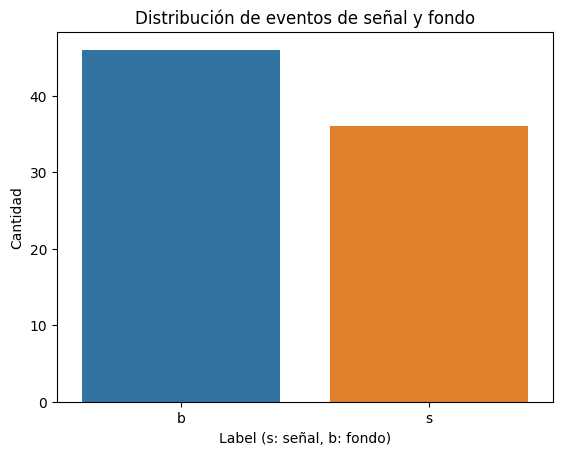

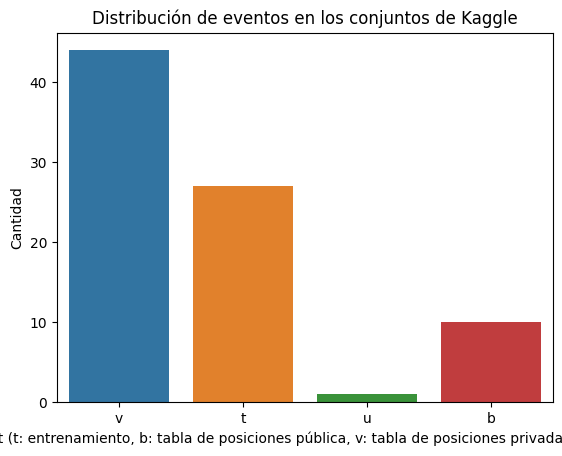

In [ ]:
# Gráfico de barras para la característica 'Label'
sns.countplot(x='Label', data=df_atlas)
plt.title("Distribución de eventos de señal y fondo")
plt.xlabel("Label (s: señal, b: fondo)")
plt.ylabel("Cantidad")
plt.show()

# Gráfico de barras para la característica 'KaggleSet'
sns.countplot(x='KaggleSet', data=df_atlas)
plt.title("Distribución de eventos en los conjuntos de Kaggle")
plt.xlabel("KaggleSet (t: entrenamiento, b: tabla de posiciones pública, v: tabla de posiciones privada, u: no utilizado)")
plt.ylabel("Cantidad")
plt.show()


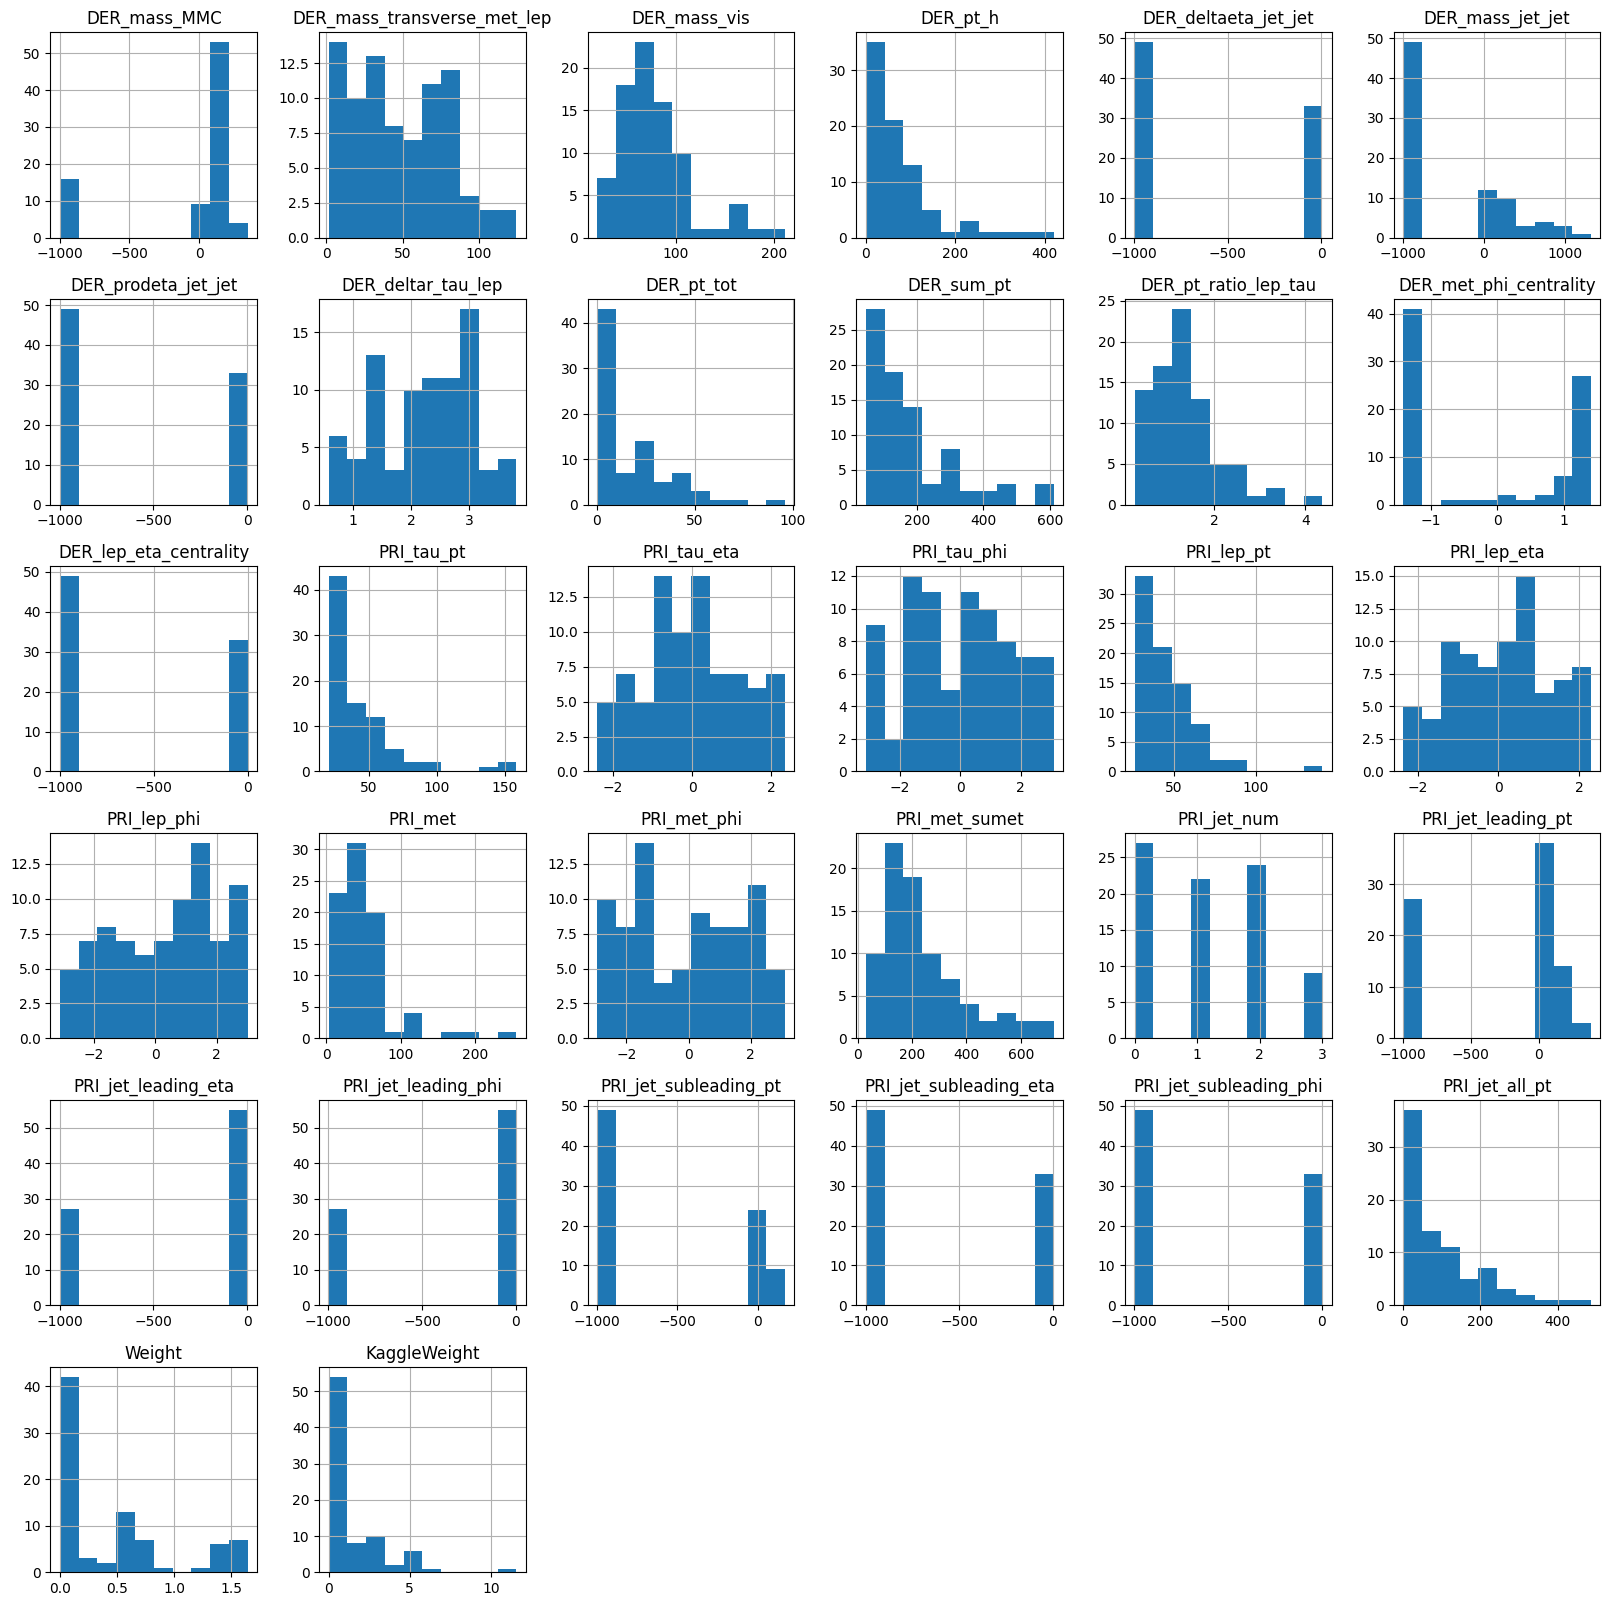

In [ ]:
df_atlas.hist(figsize=(20, 20))
plt.show()


-Identificado los valores atípicos

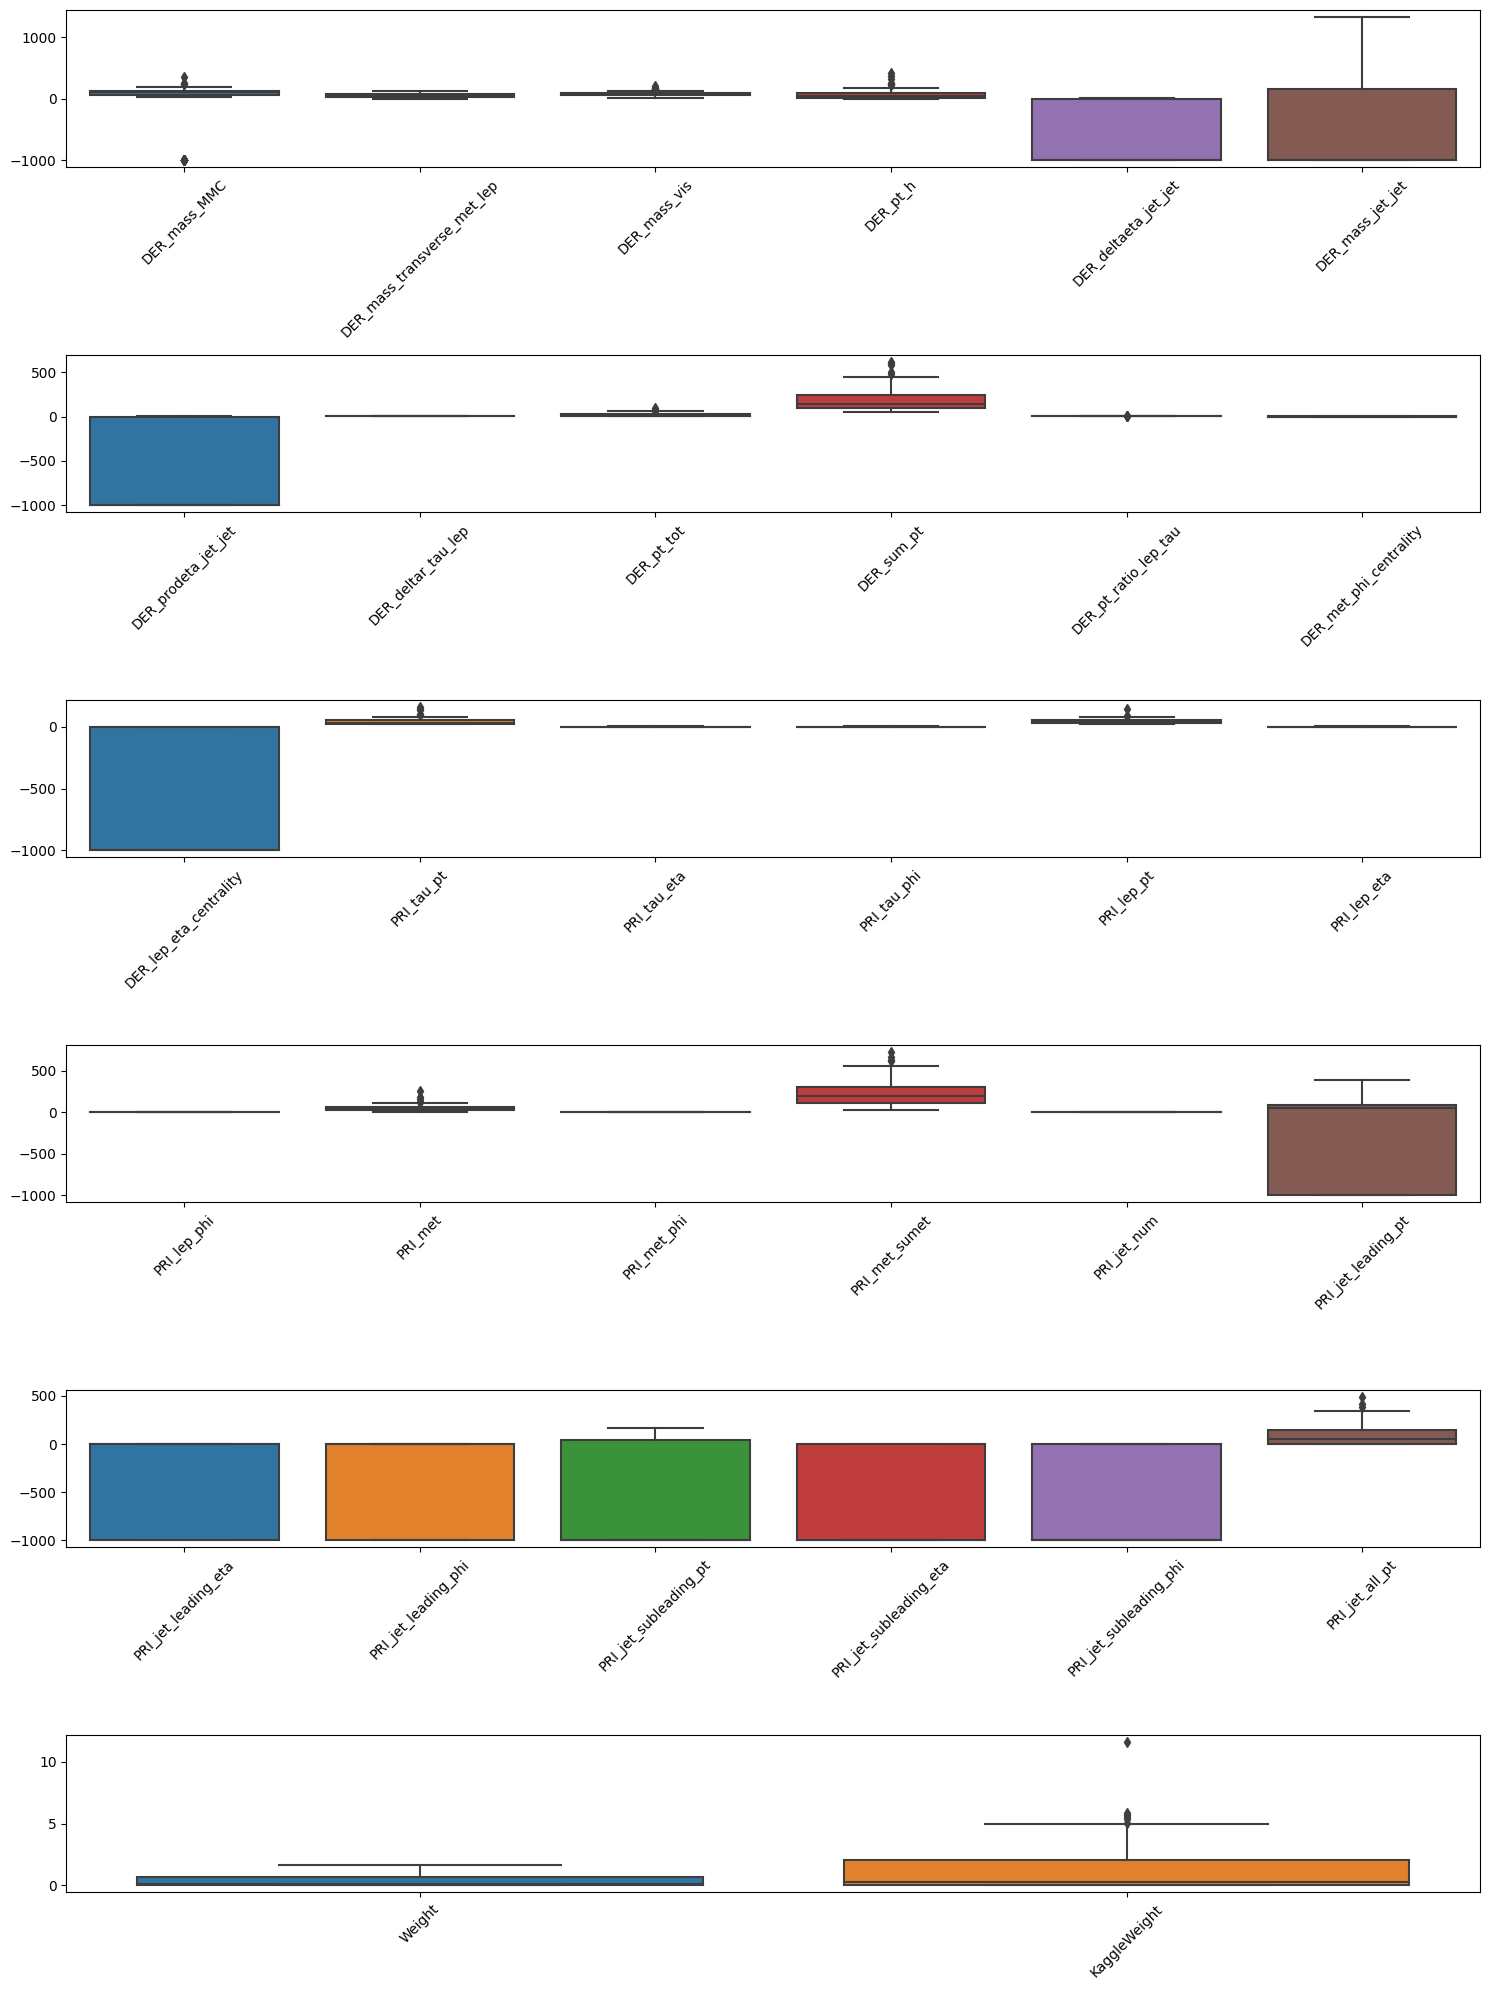

In [ ]:
all_features =df_atlas.columns

num_features_per_plot = 6
num_plots = (len(all_features) + num_features_per_plot - 1) // num_features_per_plot

fig, axes = plt.subplots(num_plots, 1, figsize=(15, 20))

for i, ax in enumerate(axes):
    start_idx = i * num_features_per_plot
    end_idx = start_idx + num_features_per_plot
    sns.boxplot(data=df_atlas[all_features[start_idx:end_idx]], ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Utilizar el rango intercuartil (IQR) para identificar y eliminar valores atípicos
Q1 = df_atlas.quantile(0.25)
Q3 = df_atlas.quantile(0.75)
IQR = Q3 - Q1
# Filtrar valores atípicos
df_filtered = df_atlas[~((df_atlas < (Q1 - 1.5 * IQR)) | (df_atlas > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df_filtered

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
372384,128.539,9.437,100.304,94.079,-999.000,-999.000,-999.000,1.866,13.504,185.526,...,-1.503,0.828,-999.000,-999.000,-999.000,81.024,0.715036,b,v,1.300100
590980,91.328,26.101,49.092,151.992,4.185,681.743,-0.728,1.233,56.502,305.712,...,-0.182,-1.139,36.558,4.003,2.659,223.724,0.025434,b,v,0.046244
96474,137.174,31.861,97.366,109.799,0.670,150.501,0.273,1.941,42.405,295.139,...,0.956,1.676,60.451,0.286,-2.261,201.544,0.000461,s,t,0.001502
437453,106.242,22.551,54.001,70.239,-999.000,-999.000,-999.000,2.762,19.076,100.713,...,-1.406,1.471,-999.000,-999.000,-999.000,51.177,0.512740,b,v,0.932279
436899,168.987,80.413,100.940,77.052,-999.000,-999.000,-999.000,2.944,24.472,153.594,...,-0.894,1.609,-999.000,-999.000,-999.000,52.972,0.549921,b,v,0.999881
502218,109.890,31.653,78.597,22.580,-999.000,-999.000,-999.000,2.814,31.352,98.888,...,-2.190,0.711,-999.000,-999.000,-999.000,34.359,0.512740,b,v,0.932279
757940,30.999,65.968,22.267,88.265,0.102,118.892,1.284,0.811,8.084,197.220,...,1.186,-1.210,44.129,1.083,2.884,142.062,0.575359,b,v,1.046135
534175,83.948,52.858,70.549,4.002,-999.000,-999.000,-999.000,2.277,44.945,116.233,...,-2.480,-0.773,-999.000,-999.000,-999.000,43.918,0.005721,s,b,0.046987
682854,111.190,20.479,81.654,17.187,-999.000,-999.000,-999.000,2.737,17.187,87.336,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.524266,b,v,0.953235
752887,120.653,4.689,74.555,45.058,5.462,598.972,-7.454,2.408,2.689,159.746,...,2.658,3.040,36.774,-2.804,1.122,78.047,0.000461,s,v,0.000840


-Producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

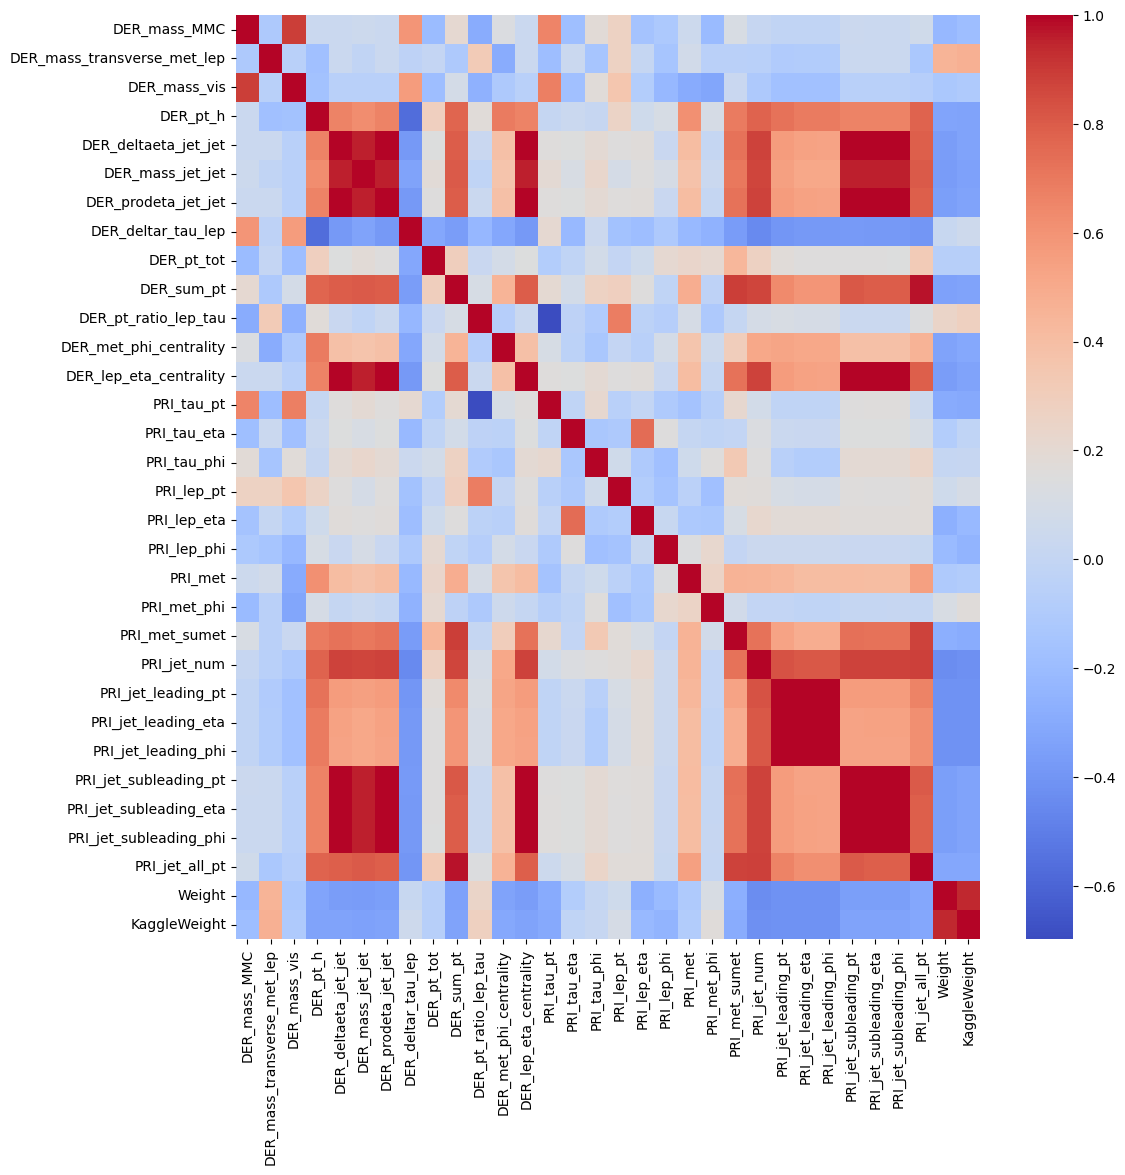

In [ ]:
# Calcular la matriz de correlación
corr_matrix = df_filtered.corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.show()


In [ ]:
y=df_atlas['Label']
X=df_atlas.drop(columns=['Label','KaggleSet','KaggleWeight'])

In [ ]:

def eda(X, y):
    if isinstance(X, pd.DataFrame) or isinstance(y,pd.DataFrame):
        eda_results = {}
        
        # Descriptive statistics
        eda_results["descriptive_stats"] = X.describe()

        # Correlation matrix
        eda_results["correlation_matrix"] = X.corr()

        # Classification or regression problem
        eda_results["is_classification"] = y.nunique() > 1 and y.nunique()< int(len(y)*0.1)

        # Outliers
        z_scores = np.abs(stats.zscore(X))
        outliers = np.where(z_scores > 3)
        eda_results["outliers"] = {X.columns[i]: np.unique(outliers[0][outliers[1] == i]) for i in range(X.shape[1])}

        # Scaling suggestions
        scaling_suggestions = {}
        for col in X.columns:
            if np.issubdtype(X[col].dtype, np.number):
                if X[col].nunique() > 2 and (X[col].skew() > 0.5 or X[col].skew() < -0.5):
                    scaling_suggestions[col] = PowerTransformer(method='yeo-johnson')
                elif 0 in X[col].quantile([0.25, 0.75]).values:
                    scaling_suggestions[col] = MinMaxScaler()
                elif X[col].skew() > 0.5 or X[col].skew() < -0.5:
                    scaling_suggestions[col] = RobustScaler()
                else:
                    scaling_suggestions[col] = StandardScaler()
            else:
                scaling_suggestions[col] = OrdinalEncoder()
        eda_results["scaling_suggestions"] = scaling_suggestions

        # PCA
        eda_results["pca"] = PCA()

        # Clustering suggestions
        clustering_suggestions = {}
        for col in X.columns:
            if X[col].dtype == np.number:
                clustering_suggestions[col] = KMeans()
        eda_results["clustering_suggestions"] = clustering_suggestions

        # GMM suggestions
        gmm_suggestions = {}
        for col in X.columns:
            if X[col].dtype == np.number:
                gmm_suggestions[col] = GaussianMixture(n_components=10)
        eda_results["gmm_suggestions"] = gmm_suggestions

        # Feature extraction and selection
        eda_results["feature_extraction"] = FeatureHasher()
        eda_results["feature_selection"] = SelectKBest(score_func=f_classif, k="all")
        # Feature selection using mutual information for classification problems
        if eda_results["is_classification"]:
            num_columns = X.select_dtypes(include=[np.number]).columns
            feature_scores = mutual_info_classif(X[num_columns], y)
            feature_scores_dict = {num_columns[i]: score for i, score in enumerate(feature_scores)}

            eda_results['feature_scores'] = feature_scores_dict
    else:
        print("X o y no son Dataframes, para poder crear la estrategia necesitamos conocer los nombres de cada columna")
        return None
    return eda_results


In [ ]:
def feature_engineering(eda_results=None, custom_scaling_dict=None):
    if eda_results is not None and custom_scaling_dict is None:
        scaling_dict = eda_results['scaling_suggestions']
    elif custom_scaling_dict is not None:
        scaling_dict = custom_scaling_dict
    else:
        raise ValueError("Debe proporcionar 'eda_results' o 'custom_scaling_dict'")
    
    transformers = []
    
    for column_name, scaler in scaling_dict.items():
        if scaler is not None:
            unique_name = f"{scaler.__class__.__name__}_{column_name}"
            transformers.append((unique_name, scaler, [column_name]))

    preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    

    return pipeline


In [ ]:
def create_advanced_pipeline(eda_results: Dict,
                             preprocessor_pipeline: Pipeline,
                             models: List[BaseEstimator] = None
                             ) -> Tuple[Union[List[Pipeline], None], List[str]]:

    classification_models = [
        LogisticRegression(), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(),
        RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(),
        MLPClassifier(), GaussianNB()
    ]

    regression_models = [
        LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(),
        RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(),
        MLPRegressor(), Lasso(), Ridge()
    ]

    if models is None:
        is_classification = eda_results["is_classification"]
        models = classification_models if is_classification else regression_models

    compatible_models = []
    incompatible_models = []

    is_classification = eda_results["is_classification"]

    for model in models:
        if (is_classification and isinstance(model, ClassifierMixin)) or (not is_classification and isinstance(model, RegressorMixin)):
            compatible_models.append(model)
        else:
            incompatible_models.append(model)

    if len(compatible_models) == 0:
        print("No se proporcionó ningún modelo compatible con el tipo de variable objetivo.")
        return None

    pipelines = []
    for model in compatible_models:
        pipe = Pipeline([
            ('preprocessor', preprocessor_pipeline),
            ('classifier' if is_classification else 'regressor', model)
        ])
        pipelines.append(pipe)

    if len(incompatible_models) > 0:
        print(f"Los siguientes modelos no son compatibles con el tipo de variable objetivo: {incompatible_models}")

    return pipelines


In [ ]:
def save_model_pickle(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

def load_model_pickle(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)


In [ ]:
def divide_data(X, y, test_ratio=None, random_seed=None):
    if test_ratio is None:
        test_ratio = 0.3
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=random_seed)

    return X_train, X_test, y_train, y_test

In [ ]:
def train_and_evaluate_models(eda_results: Dict,pipelines: List[Pipeline], X_train: pd.DataFrame, y_train: pd.Series, 
                              X_test: pd.DataFrame, y_test: pd.Series, 
                              param_grids: Dict[str, Dict[str, List[Union[int, float]]]] = None,
                              search_method: Optional[str] = None,
                              search_methods_dict: Optional[Dict[str, Type[BaseSearchCV]]] = None):
    if pipelines is None:
        print("No se han encontrado modelos compatibles.")
        return None, None
    best_model = None
    best_score = float('-inf')
    models_metrics = {}

    if search_methods_dict is None:
        search_methods_dict = {
            'gridsearch': GridSearchCV,
            'randomsearch': RandomizedSearchCV
}
    if param_grids is None:
        param_grids = {
        'classification_param_grids' :{
        'LogisticRegression':{
            
            "penalty": ["l1", "l2"],
            "C": np.logspace(-4, 4, 20),
            "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
            "max_iter": [100, 500, 1000],
        },
        'SVC':{
            
            "C": np.logspace(-3, 3, 7),
            "kernel": ["linear", "poly", "rbf", "sigmoid"],
            "degree": [2, 3, 4],
            "gamma": ["scale", "auto"] + list(np.logspace(-3, 3, 7)),
        },
        'KNeighborsClassifier':{
            
            "n_neighbors": range(1, 31),
            "weights": ["uniform", "distance"],
            "metric": ["euclidean", "manhattan", "chebyshev", "minkowski"],
        },
        'DecisionTreeClassifier':{
            
            "criterion": ["gini", "entropy"],
            "max_depth": [None] + list(range(1, 21)),
            "min_samples_split": [2, 5, 10, 20],
            "min_samples_leaf": [1, 2, 5, 10],
        },
        'RandomForestClassifier':{
            
            "n_estimators": [10, 50, 100, 200, 500],
            "criterion": ["gini", "entropy"],
            "max_depth": [None] + list(range(1, 21)),
            "min_samples_split": [2, 5, 10, 20],
            "min_samples_leaf": [1, 2, 5, 10],
        },
        'AdaBoostClassifier':{
            
            "n_estimators": [10, 50, 100, 200, 500],
            "learning_rate": [0.001, 0.01, 0.1, 1, 10],
            "algorithm": ["SAMME", "SAMME.R"],
        },
         'GradientBoostingClassifier':{
           
            "n_estimators": [10, 50, 100, 200, 500],
            "learning_rate": [0.001, 0.01, 0.1, 1, 10],
            "max_depth": [1, 3, 5, 7, 9],
            "min_samples_split": [2, 5, 10, 20],
            "min_samples_leaf": [1, 2, 5, 10],
        },
        'MLPClassifier':{
            
            "hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 100)],
            "activation": ["identity", "logistic", "tanh", "relu"],
            "solver": ["lbfgs", "sgd", "adam"],
            "alpha": np.logspace(-5, 3, 9),
            "learning_rate": ["constant", "invscaling", "adaptive"],
            "max_iter": [100, 200, 500, 1000],
        },
        'GaussianNB':{
            
            "var_smoothing": np.logspace(-10, -1, 10),
        },
        },

        'regression_param_grids' : {
            'LinearRegression':{
                
                "fit_intercept": [True, False],
                "normalize": [True, False],
            },
            'SVR':{
                
                "C": np.logspace(-3, 3, 7),
                "kernel": ["linear", "poly", "rbf", "sigmoid"],
                "degree": [2, 3, 4],
                "gamma": ["scale", "auto"] + list(np.logspace(-3, 3, 7)),
            },
             'KNeighborsRegressor':{
               
                "n_neighbors": range(1, 31),
                "weights": ["uniform", "distance"],
                "metric": ["euclidean", "manhattan", "chebyshev", "minkowski"],
            },
            'DecisionTreeRegressor':{
                
                "criterion": ["mse", "friedman_mse", "mae"],
                "max_depth": [None] + list(range(1, 21)),
                "min_samples_split": [2, 5, 10, 20],
                "min_samples_leaf": [1, 2, 5, 10],
            },
            'KNeighborsRegressor':{
                
                "n_neighbors": range(1, 31),
                "weights": ["uniform", "distance"],
                "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
            },
            'DecisionTreeRegressor':{
               
                "criterion": ["mse", "friedman_mse", "mae"],
                "splitter": ["best", "random"],
                "max_depth": [None, 10, 20, 30, 40, 50],
                "min_samples_split": [2, 5, 10, 20],
                "min_samples_leaf": [1, 2, 4, 8],
            },
            'RandomForestRegressor':{
                
                "n_estimators": [10, 50, 100, 200, 500],
                "criterion": ["mse", "mae"],
                "max_depth": [None, 10, 20, 30, 40, 50],
                "min_samples_split": [2, 5, 10, 20],
                "min_samples_leaf": [1, 2, 4, 8],
            },
            'AdaBoostRegressor':{
                
                "n_estimators": [10, 50, 100, 200, 500],
                "learning_rate": [0.001, 0.01, 0.1, 1, 10],
                "loss": ["linear", "square", "exponential"],
            },
            'GradientBoostingRegressor':{
                "n_estimators": [10, 50, 100, 200, 500],
                "learning_rate": [0.001, 0.01, 0.1, 1, 10],
                "loss": ["ls", "lad", "huber", "quantile"],
                "max_depth": [1, 3, 5, 7, 9],
                "min_samples_split": [2, 5, 10, 20],
                "min_samples_leaf": [1, 2, 4, 8],
            },
            'MLPRegressor':{
                
                "hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 100)],
                "activation": ["identity", "logistic", "tanh", "relu"],
                "solver": ["lbfgs", "sgd", "adam"],
                "alpha": np.logspace(-5, 3, 9),
                "learning_rate": ["constant", "invscaling", "adaptive"],
                "max_iter": [100, 200, 500, 1000],
            },
            'Lasso':{
                
                "alpha": np.logspace(-5, 3, 9),
                "fit_intercept": [True, False],
                "normalize": [True, False],
            },
            'Ridge':{
                
                "alpha": np.logspace(-5, 3, 9),
                "fit_intercept": [True, False],
                "normalize": [True, False],
                "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"],
            }
        }

        }
    if search_method is None:
        best_search_method = None
        best_search_score = float('-inf')
    else:
        if search_method not in search_methods_dict:
            raise ValueError(f"search_method debe ser uno de {', '.join(search_methods_dict.keys())}")
    if eda_results["is_classification"]:
            param_grids=param_grids["classification_param_grids"]
    else:
        param_grids=param_grids["regression_param_grids"]    

    for pipe in pipelines:

        model_name = type(pipe.named_steps['classifier' if 'classifier' in pipe.named_steps else 'regressor']).__name__
        print(f"\nEvaluando modelo: {model_name}")
        if param_grids is not None and model_name in param_grids:
            param_grid = {f"{pipe.steps[-1][0]}__{key}": values for key, values in param_grids[model_name].items()}
            if search_method is None:
                print(f'Identificando la mejor técnica de búsqueda de hiperparámetros para {model_name}')
                for method_name, SearchCV in search_methods_dict.items():
                    search_cv = SearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=0)
                    search_cv.fit(X_train, y_train)

                    if search_cv.best_score_ > best_search_score:
                        best_search_method = method_name
                        best_search_score = search_cv.best_score_
                        best_search_cv = search_cv

                print(f"Mejor técnica de búsqueda de hiperparámetros para {model_name}: {best_search_method}")
            else:
                SearchCV = search_methods_dict[search_method]
                best_search_cv = SearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=0)
                best_search_cv.fit(X_train, y_train)

            best_params = best_search_cv.best_params_
            model = best_search_cv.best_estimator_
            save_model_pickle(model, f"{model_name}.pkl")
        else:
            model = pipe.fit(X_train, y_train)
            best_params = None

        if isinstance(pipe.named_steps['classifier' if 'classifier' in pipe.named_steps else 'regressor'], ClassifierMixin):
            train_predictions = model.predict(X_train)
            test_predictions = model.predict(X_test)

            train_report = classification_report(y_train, train_predictions, output_dict=True)
            test_report = classification_report(y_test, test_predictions, output_dict=True)

            score = test_report['weighted avg']['f1-score']
        else:
            train_predictions = model.predict(X_train)
            test_predictions = model.predict(X_test)

            train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
            test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
            train_r2 = r2_score(y_train, train_predictions)
            test_r2 = r2_score(y_test, test_predictions)

            score = test_r2

        if score > best_score:
            best_score = score
            best_model = model
        models_metrics[model_name] = {
            'model': model,
            'best_params': best_params,
            'train': train_report if isinstance(pipe.named_steps['classifier' if 'classifier' in pipe.named_steps else 'regressor'], ClassifierMixin) else {'rmse': train_rmse, 'r2': train_r2},
            'test': test_report if isinstance(pipe.named_steps['classifier' if 'classifier' in pipe.named_steps else 'regressor'], ClassifierMixin) else {'rmse': test_rmse, 'r2': test_r2},
            'search_method': best_search_method
        }

    best_model_name = type(best_model.named_steps['classifier' if 'classifier' in best_model.named_steps else 'regressor']).__name__
    best_model_metrics = models_metrics[best_model_name]

    print(f"\nMejor modelo: {best_model_name}")
    print("Mejores hiperparámetros:")
    print(best_model_metrics['best_params'])
    print(f"\nTécnica de búsqueda de hiperparámetros utilizada: {best_model_metrics['search_method']}")

    if 'weighted avg' in best_model_metrics['train']:
        print("\nTrain:")
        print(classification_report(y_train, best_model.predict(X_train)))
        print("\nTest:")
        print(classification_report(y_test, best_model.predict(X_test)))
    else:
        print("\nTrain:")
        print(f"RMSE: {best_model_metrics['train']['rmse']:.4f}")
        print(f"R2: {best_model_metrics['train']['r2']:.4f}")

        print("\nTest:")
        print(f"RMSE: {best_model_metrics['test']['rmse']:.4f}")
        print(f"R2: {best_model_metrics['test']['r2']:.4f}")

    return best_model, models_metrics
           


In [ ]:
param_grids = {
    'classification_param_grids':{
        'LogisticRegression':{
            
            "penalty": ["l1", "l2"],
            "C": np.logspace(-4, 8, 20),
            "solver": ["liblinear"],
            "max_iter": [100],
        },
        'DecisionTreeClassifier':{
            
            "criterion": ["gini", "entropy"],
            "max_depth": [None] + list(range(1, 21,7)),
            "min_samples_split": [2, 5, 10, 20],
            "min_samples_leaf": [1, 2, 5, 10],
        },
        'RandomForestClassifier':{
            
            "n_estimators": [10, 50, 100],
            "criterion": ["gini", "entropy"],
            "max_depth": [None] + list(range(1, 21,7)),
            "min_samples_split": [2, 5, 10, 20],
            "min_samples_leaf": [1, 2, 5, 10],
        }
        }
}

In [ ]:
eda=eda(X,y)

In [ ]:
eda['scaling_suggestions']

{'DER_mass_MMC': PowerTransformer(),
 'DER_mass_transverse_met_lep': StandardScaler(),
 'DER_mass_vis': PowerTransformer(),
 'DER_pt_h': PowerTransformer(),
 'DER_deltaeta_jet_jet': StandardScaler(),
 'DER_mass_jet_jet': PowerTransformer(),
 'DER_prodeta_jet_jet': StandardScaler(),
 'DER_deltar_tau_lep': StandardScaler(),
 'DER_pt_tot': PowerTransformer(),
 'DER_sum_pt': PowerTransformer(),
 'DER_pt_ratio_lep_tau': PowerTransformer(),
 'DER_met_phi_centrality': StandardScaler(),
 'DER_lep_eta_centrality': StandardScaler(),
 'PRI_tau_pt': PowerTransformer(),
 'PRI_tau_eta': StandardScaler(),
 'PRI_tau_phi': StandardScaler(),
 'PRI_lep_pt': PowerTransformer(),
 'PRI_lep_eta': StandardScaler(),
 'PRI_lep_phi': StandardScaler(),
 'PRI_met': PowerTransformer(),
 'PRI_met_phi': StandardScaler(),
 'PRI_met_sumet': PowerTransformer(),
 'PRI_jet_num': MinMaxScaler(),
 'PRI_jet_leading_pt': PowerTransformer(),
 'PRI_jet_leading_eta': PowerTransformer(),
 'PRI_jet_leading_phi': PowerTransformer()

In [ ]:
preprocessor_pipeline = feature_engineering(eda_results=eda)

In [ ]:
X_train, X_test, y_train, y_test = divide_data(X, y, test_ratio=0.3,random_seed=42)

In [ ]:
advanced_pipelines_custom =create_advanced_pipeline(eda, preprocessor_pipeline, models=[DecisionTreeClassifier(),LogisticRegression(),RandomForestClassifier()])           

In [ ]:
best_model, models_metrics = train_and_evaluate_models(eda,advanced_pipelines_custom, X_train, y_train, X_test, y_test,param_grids)     


Evaluando modelo: DecisionTreeClassifier
Identificando la mejor técnica de búsqueda de hiperparámetros para DecisionTreeClassifier
Mejor técnica de búsqueda de hiperparámetros para DecisionTreeClassifier: gridsearch

Evaluando modelo: LogisticRegression
Identificando la mejor técnica de búsqueda de hiperparámetros para LogisticRegression
Mejor técnica de búsqueda de hiperparámetros para LogisticRegression: gridsearch

Evaluando modelo: RandomForestClassifier
Identificando la mejor técnica de búsqueda de hiperparámetros para RandomForestClassifier
Mejor técnica de búsqueda de hiperparámetros para RandomForestClassifier: gridsearch

Mejor modelo: DecisionTreeClassifier
Mejores hiperparámetros:
{'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

Técnica de búsqueda de hiperparámetros utilizada: gridsearch

Train:
              precision    recall  f1-score   support

           b       1.00      1.00    

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           b       1.00      1.00      1.00        14
           s       1.00      1.00      1.00        11

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [ ]:
numerical_features = X.columns


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

pipelines = {
    "lr": Pipeline([('preprocessor', preprocessor), ('clf', LogisticRegression())]),
    "dt": Pipeline([('preprocessor', preprocessor), ('clf', DecisionTreeClassifier())]),
    "rf": Pipeline([('preprocessor', preprocessor), ('clf', RandomForestClassifier())])
}


# Crear los grid search params
param_grids = {
    "lr": {
        'clf__penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'clf__C': np.logspace(-4, 4, 20),
        'clf__solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
    },
    "dt": {
        'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': list(range(1, 10)) + [None],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4]
    },
    "rf": {
        'clf__n_estimators': [10, 30, 100, 300, 1000],
        'clf__max_features': ['auto', 'sqrt'],
        'clf__max_depth' : [5, 10, 20, 30, None],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4]
    }
}

# Crear el GridSearchCV para cada modelo
grid_searches = {}
for model_name in pipelines.keys():
    grid_searches[model_name] = GridSearchCV(estimator=pipelines[model_name],
                                             param_grid=param_grids[model_name],
                                             cv=5, verbose=2, n_jobs=-1)

# Entrenar los modelos y encontrar los mejores parámetros
best_params = {}
for model_name in pipelines.keys():
    grid_searches[model_name].fit(X_train, y_train)
    best_params[model_name] = grid_searches[model_name].best_params_

print(best_params)


Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Fitting 5 folds for each of 450 candidates, totalling 2250 fits
{'lr': {'clf__C': 0.08858667904100823, 'clf__penalty': 'l1', 'clf__solver': 'saga'}, 'dt': {'clf__criterion': 'gini', 'clf__max_depth': 1, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}, 'rf': {'clf__max_depth': 10, 'clf__max_features': 'auto', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10, 'clf__n_estimators': 30}}


In [ ]:
print(grid_searches['lr'].best_score_)

0.9469696969696969


In [ ]:
lr=grid_searches['lr'].best_estimator_

In [ ]:
lr=load_model_pickle('/content/LogisticRegression.pkl')

In [ ]:
# Predecir las etiquetas para los datos de prueba
y_pred = lr.predict(X_train)

# Calcular la precisión de la predicción
accuracy = accuracy_score(y_train, y_pred)

print('Accuracy of the model: ', accuracy)

Accuracy of the model:  0.9122807017543859


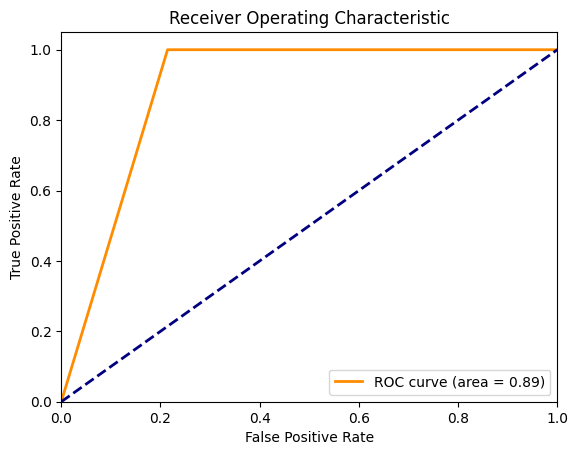

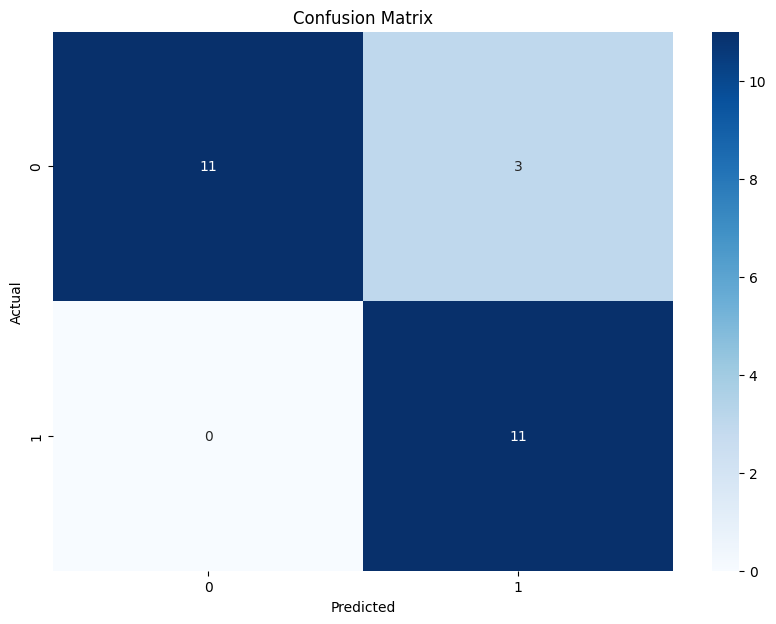

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns
import numpy as np
from sklearn import preprocessing

# Crear el codificador
le = preprocessing.LabelEncoder()

# Ajustar el codificador y transformar y_test y y_pred a etiquetas binarias
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)  # Si y_pred ya es binario (0 y 1), puedes omitir esta línea

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_encoded)
roc_auc = auc(fpr, tpr)

plt.figure()

# Dibujar la curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test_encoded, np.round(y_pred_encoded))

# Dibujar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
